In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

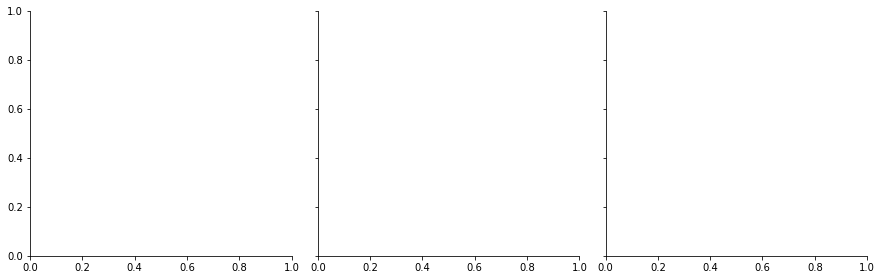

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4.5), gridspec_kw={'hspace': 0.0, 'wspace': 0.1}, sharey=True)
palette = sns.color_palette('Greys', n_colors=2)
fontsize = 15
font = {
    'family' : 'DejaVu Sans',
    'size'   : fontsize
}
plt.rc('font', **font)
sns.despine(top=True, right=True)

def avg(lst):
    return sum(lst)/len(lst)

"""
for ax in axs.flat:
        ax.legend([],[], frameon=False)
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend( lines, labels, loc = 'upper center', ncol=2, labelspacing=0.)
"""

def myplot(kind, axs, title):
    if kind == "lat":
        plot_latency(axs, title)
    if kind == "cpu":
        plot_cpu(axs, title)
    if kind == "goodput":
        plot_goodput(axs, title)
    if kind == "cpg":
        plot_cpu_per_goodput(axs, title)

title_set = False
y_label = ""

def plot_latency(axs, title):
    global title_set
    global y_label
    results = []
    for e in pq_100:
      results.append([e, "parquet", "100"])
    for e in pq_10:
      results.append([e, "parquet", "10"])
    for e in pq_1:
      results.append([e, "parquet", "1"])
    for e in rpq_100:
      results.append([e, 'rados-\nparquet', "100"])
    for e in rpq_10:
      results.append([e, 'rados-\nparquet', "10"])
    for e in rpq_1:
      results.append([e, 'rados-\nparquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['Duration (s)', 'File Format', 'Selectivity (%)'])
    df[['Duration (s)']] = df[['Duration (s)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="Duration (s)", hue="File Format", data=df, ci='sd', capsize=.15, errwidth=0.5, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 210))
    sns_plot.set_title(title)
    sns_plot.tick_params(axis="y", labelsize=24)
    sns_plot.tick_params(axis="x", labelsize=23)
    sns_plot.set_xlabel('Selectivity (%)', fontsize=22)
    if not title_set:
        y_label = 'Duration (s)'
        title_set = True
    sns_plot.set_ylabel(y_label, fontsize=18)
    axs.legend([],[], frameon=False)


def plot_cpu(axs, title):
    results = []
    for e in cpu_pq_100:
      results.append([e, "parquet", "100"])
    for e in cpu_pq_10:
      results.append([e, "parquet", "10"])
    for e in cpu_pq_1:
      results.append([e, "parquet", "1"])
    for e in cpu_rpq_100:
      results.append([e, 'rados-parquet', "100"])
    for e in cpu_rpq_10:
      results.append([e, 'rados-parquet', "10"])
    for e in cpu_rpq_1:
      results.append([e, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['CPU Usage (%)', 'File Format', 'Selectivity (%)'])
    df[['CPU Usage (%)']] = df[['CPU Usage (%)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="CPU Usage (%)", hue="File Format", data=df, ax=axs, ci='sd', capsize=.15, errwidth=0.5, palette=palette)
    sns_plot.set(ylim=(0, 350000))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('CPU Usage', fontsize=10)
    fig.savefig('cpu_paper.png', dpi=600)


def plot_goodput(axs, title):
    results = []
    for e in pq_100:
      results.append([(154.8/e)*1000, "parquet", "100"])
    for e in pq_10:
      results.append([(15.48/e)*1000, "parquet", "10"])
    for e in pq_1:
      results.append([(1.548/e)*1000, "parquet", "1"])
    for e in rpq_100:
      results.append([(154.8/e)*1000, 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([(15.48/e)*1000, 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([(1.548/e)*1000, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['Goodput (MB/s)', 'File Format', 'Selectivity (%)'])
    df[['Goodput (MB/s)']] = df[['Goodput (MB/s)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="Goodput (MB/s)", hue="File Format", ci='sd', capsize=.15, errwidth=0.5, data=df, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 1000))
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('Goodput (MB/s)', fontsize=10)
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    fig.savefig('goodput_paper.png', dpi=600)


def plot_cpu_per_goodput(axs, title):
    results = []
    for e in pq_100:
      results.append([ avg(cpu_pq_100)/((154.8/e)*1000) , "parquet", "100"])
    for e in pq_10:
      results.append([ avg(cpu_pq_10)/((15.48/e)*1000) , "parquet", "10"])
    for e in pq_1:
      results.append([ avg(cpu_pq_1)/((1.548/e)*1000) , "parquet", "1"])
    for e in rpq_100:
      results.append([ avg(cpu_rpq_100)/((154.8/e)*1000) , 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([ avg(cpu_rpq_10)/((15.48/e)*1000) , 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([ avg(cpu_rpq_1)/((1.548/e)*1000) , 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['CPU/Goodput', 'File Format', 'Selectivity (%)'])
    df[['CPU/Goodput']] = df[['CPU/Goodput']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="CPU/Goodput", hue="File Format", data=df, ci='sd', capsize=.15, errwidth=0.5, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 40000))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('CPU/Goodput', fontsize=10)
    fig.savefig('cpu_per_goodput_paper.png', dpi=600)

In [3]:
kind="lat"

In [4]:
# 4 Storage Node, 1 OSD/Node, 16 Threads / Client, 64 MB Files
pq_1 =  [168.35970759391785, 167.43749499320984]
pq_10 =  [174.87274408340454, 174.70416641235352]
pq_100 =  [165.73410844802856, 165.58826351165771]
cpu_pq_100 = [255870.20000000007, 255018.50000000006]
cpu_pq_10 = [258100.4, 257697.6999999999]
cpu_pq_1 = [255534.4000000001, 257273.19999999995]
rpq_1 =  [147.99598908424377, 145.49434685707092]
rpq_10 = [156.6197259426117, 158.82945156097412]
rpq_100 = [199.2479431629181, 202.1522319316864]
cpu_rpq_1 = [197783.5, 191827.69999999998]
cpu_rpq_10 = [203158.60000000003, 210938.00000000006]
cpu_rpq_100 = [266699.50000000006, 266137.20000000007]
myplot(kind, axs[0], "4 OSD")

# 8 Storage Node, 1 OSD/Node, 32 Threads / Client, 64 MB Files
rpq_100 =  [171.89235854148865, 171.22872924804688, 171.1827733516693]
rpq_10 =  [96.9377167224884, 96.49626350402832, 98.85771465301514]
rpq_1 =  [91.093186378479, 91.29252290725708]
pq_100 = [164.21448945999146, 166.64239311218262]
pq_10 = [171.62123465538025, 172.54202485084534]
pq_1 = [166.97980737686157, 166.61639142036438] 
cpu_rpq_100 = [269973.9, 261585.8]
cpu_rpq_10 = [192835.20000000004, 197649.59999999998]
cpu_rpq_1 = [179833.59999999998, 189418.80000000002]
cpu_pq_100 = [262260.9, 262251.89999999997]
cpu_pq_10 = [273248.5, 275669.30000000005]
cpu_pq_1 = [271434.69999999995, 265233.19999999995]
myplot(kind, axs[1], "8 OSD")

# 16 Storage Node, 1 OSD/Node, 64 Threads / Client, 64 MB Files
rpq_100 =  [186.96529054641724, 181.93869733810425]
rpq_10 =  [47.7777624130249, 48.2372522354126]
rpq_1 = [43.84521508216858, 45.833160161972046]
pq_100 =  [177.6786870956421, 180.38822317123413]
pq_10 =  [182.4313941001892, 184.1520962715149]
pq_1 =  [177.76280212402344, 179.04515767097473]
cpu_rpq_100 = [282402.4000000001, 300565.5]
cpu_rpq_10 = [185665.19999999995, 186640.59999999995]
cpu_rpq_1 = [185102.3, 184939.39999999994]
cpu_pq_100 = [296501.8000000001, 281438.0999999999]
cpu_pq_10 = [303661.29999999993, 298839.0000000001]
cpu_pq_1 = [295033.29999999993, 295036.8999999999]
myplot(kind, axs[2], "16 OSD")

In [5]:
# ax.legend([],[], frameon=False)
print(len(fig.axes))
plotaxs = fig.axes[2]
lines = plotaxs.get_legend_handles_labels()[0]
labels = plotaxs.get_legend_handles_labels()[1]

print(lines)
print(labels)

# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend( lines, labels, labelspacing=0., loc="lower center", borderaxespad=5, frameon=False, ncol=2)
fig.legend(lines, labels, loc='upper right', fontsize=15, frameon=True)

fig.tight_layout()
fig.savefig('latency_hotstorage.pdf', bbox_inches='tight')

3
[<BarContainer object of 3 artists>, <BarContainer object of 3 artists>]
['parquet', 'rados-\nparquet']


<ipython-input-5-d109f8d1e8ff>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
